In [7]:
import pandas as pd
import os

# Correct file location
file_location = r'C:\Users\rawoo\Downloads\TCS_RIO_125\RIO_125\hr_salary_data_with_job_titles.csv'

# Print the file location
print(f"File location: {file_location}")

# Check if the file exists
if os.path.exists(file_location):
    # Read the CSV file
    df = pd.read_csv(file_location)
    
    # Print the first 5 rows
    print(df.head())
else:
    print(f"File not found: {file_location}")


File location: C:\Users\rawoo\Downloads\TCS_RIO_125\RIO_125\hr_salary_data_with_job_titles.csv
               Name  Age  Years_of_Experience          Job_Title  \
0       Rati Ramesh   53                    2         HR Manager   
1      Nirvi Saxena   39                    1   Graphic Designer   
2         Zara Gole   32                    7   Graphic Designer   
3        Krish Kaul   45                   16         HR Manager   
4  Anahita Deshmukh   43                   14  Financial Analyst   

  Current_Salary_in_Lakhs  
0              3.30 lakhs  
1              3.15 lakhs  
2              4.05 lakhs  
3              5.40 lakhs  
4              5.10 lakhs  


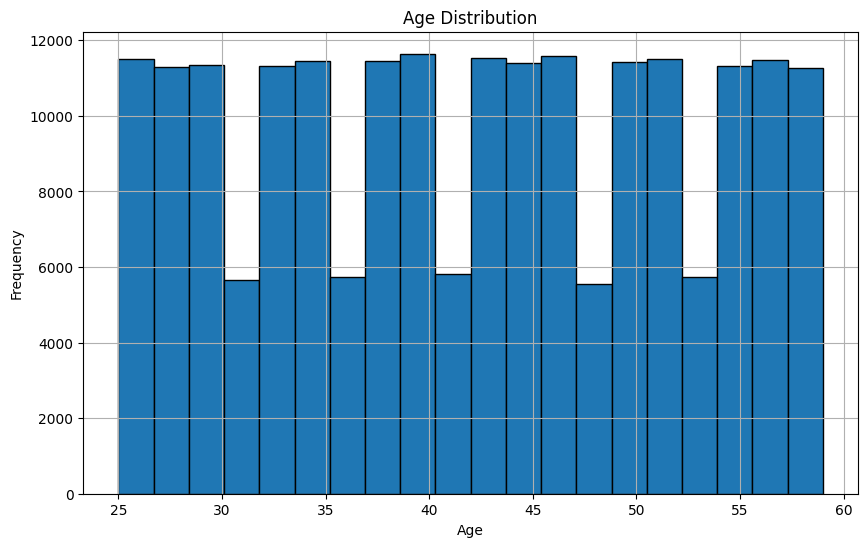

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file location
file_location = r'C:\Users\rawoo\Downloads\TCS_RIO_125\RIO_125\hr_salary_data_with_job_titles.csv'

# Read the CSV file
df = pd.read_csv(file_location)

# Convert 'Age' to numeric and handle errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with NaN values in 'Age'
df = df.dropna(subset=['Age'])

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Job_Title
Business Analyst        20266
Product Manager         20116
Data Scientist          20099
Project Manager         20066
Software Engineer       20050
Sales Executive         19962
Graphic Designer        19887
Marketing Specialist    19865
HR Manager              19862
Financial Analyst       19827
Name: count, dtype: int64


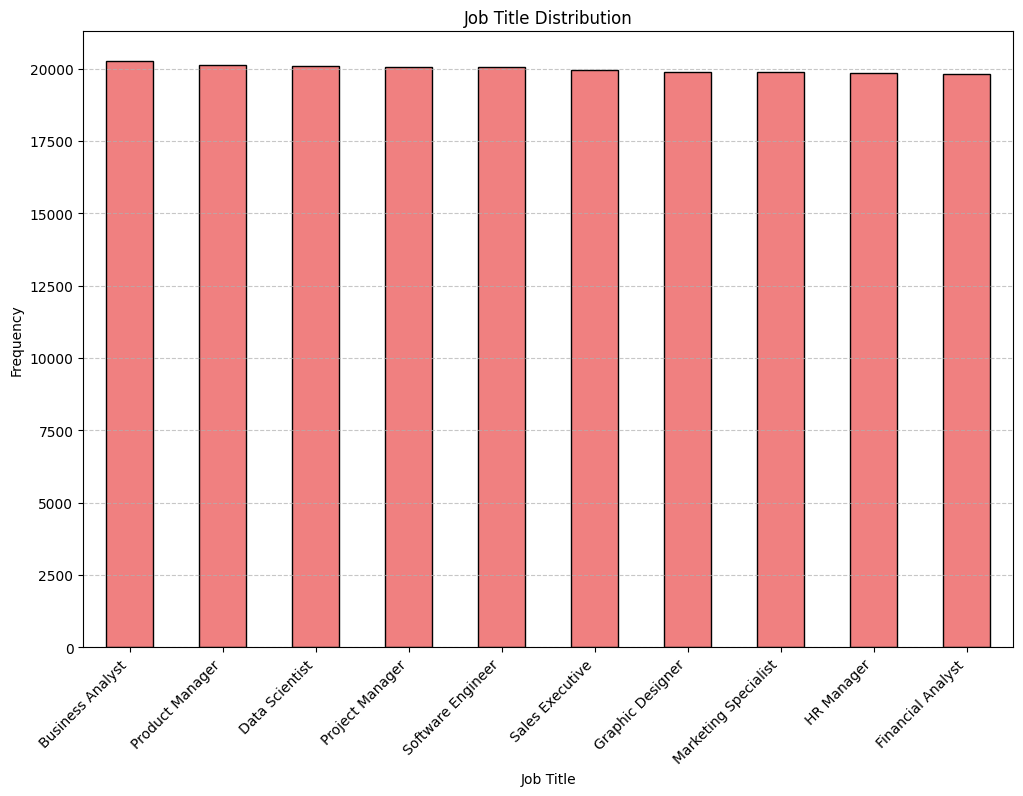

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file location
file_location = r'C:\Users\rawoo\Downloads\TCS_RIO_125\RIO_125\hr_salary_data_with_job_titles.csv'

# Read the CSV file
df = pd.read_csv(file_location)

# Check the unique values in the 'Job_Title' column to understand its distribution
print(df['Job_Title'].value_counts())

# Plot the distribution of job titles
plt.figure(figsize=(12, 8))
df['Job_Title'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Job Title Distribution')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


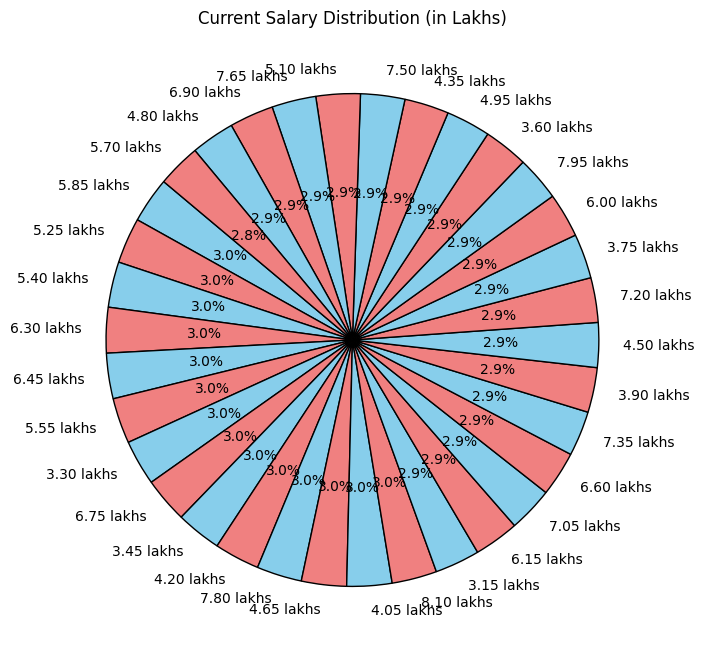

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file location
file_location = r'C:\Users\rawoo\Downloads\TCS_RIO_125\RIO_125\hr_salary_data_with_job_titles.csv'

# Read the CSV file
df = pd.read_csv(file_location)

# Get the value counts for 'Current_Salary_in_Lakhs'
salary_counts = df['Current_Salary_in_Lakhs'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('Current Salary Distribution (in Lakhs)')
plt.show()


R^2 score: 1.0
Mean Absolute Error (MAE): 1.2012186800802738e-14
Mean Squared Error (MSE): 1.917922670933358e-28
Root Mean Squared Error (RMSE): 1.3848908516317659e-14


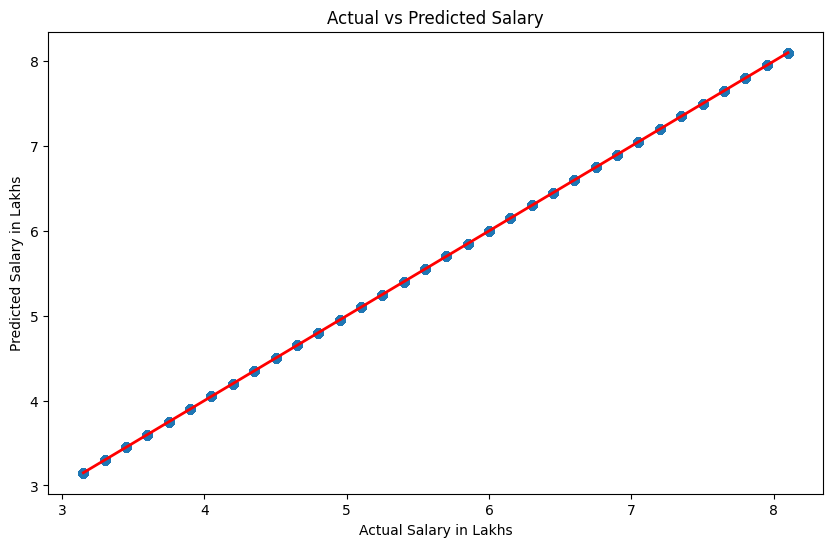

In [14]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the saved model and label encoder
model = joblib.load('model.pkl')
le = joblib.load('le.pkl')

# Load and preprocess the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    if 'Job_Title' not in data.columns or 'Current_Salary_in_Lakhs' not in data.columns:
        raise ValueError("CSV file must contain 'Job_Title' and 'Current_Salary_in_Lakhs' columns.")
    
    data['Job_Title'] = le.transform(data['Job_Title'])
    
    # Remove ' lakhs' and convert salary to float
    data['Current_Salary_in_Lakhs'] = data['Current_Salary_in_Lakhs'].str.replace(' lakhs', '').astype(float)
    
    X = data[['Age', 'Years_of_Experience', 'Job_Title']]
    y = data['Current_Salary_in_Lakhs']
    
    return X, y

# Evaluate the model
def evaluate_model(csv_file):
    X, y = load_data(csv_file)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"R^2 score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    
    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)
    plt.xlabel("Actual Salary in Lakhs")
    plt.ylabel("Predicted Salary in Lakhs")
    plt.title("Actual vs Predicted Salary")
    plt.show()

# Main function
if __name__ == "__main__":
    csv_file = r"C:\Users\rawoo\Downloads\TCS_RIO_125\RIO_125\hr_salary_data_with_job_titles.csv"
    evaluate_model(csv_file)
